<a href="https://colab.research.google.com/github/Akshitasama/akshita_INFO5731_Spring2021/blob/main/In_Class_exercises_10_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

# **Reading Data from CSV File**

In [ ]:
import pandas as pd
info = pd.read_csv("Amazon_Unlocked_Mobile.csv", error_bad_lines=False)
#data = pd.read_csv("Amazon_Unlocked_Mobile.csv")
info = info.head(5000)
info

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
4995,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,5,This review is not for the product as you may ...,64.0
4996,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,4,The product was in good structure. I'm still n...,0.0
4997,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,1,The iPhone was fine. It works and is in good c...,157.0
4998,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,2,Screen cracked really quick.,0.0


In [ ]:
info.shape

(5000, 6)

In [ ]:
all_null_values_removed=info.dropna()

In [ ]:
all_null_values_removed.shape

(3422, 6)

**Visualizing Ratings**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


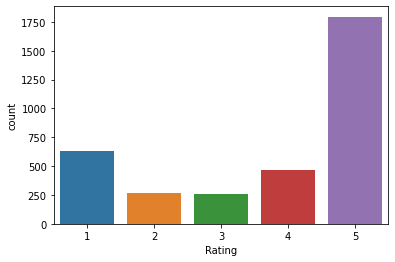

In [ ]:
import seaborn as sns
sns.countplot(all_null_values_removed.Rating)

**Classifying Ratings as Positive or Negative**

In [ ]:
def review_classification(rating):
    if rating < 3:
        return 'negative'
    return 'positive'

rating_classification = data_after_removing_null_values['Rating'].map(review_classification) 
data_after_removing_null_values['Rating'] = rating_classification

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
all_null_values_removed['Rating'].value_counts()

positive    2522
negative     900
Name: Rating, dtype: int64

**Visualizing Ratings**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


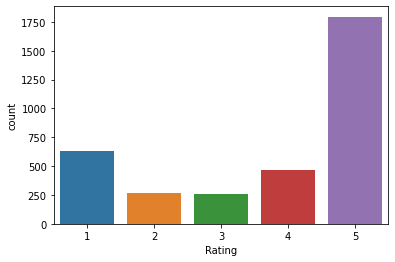

In [ ]:
import seaborn as sns
sns.countplot(all_null_values_removed.Rating)

# **Data Cleaning**

In [ ]:
import re
x=0;
for done in all_null_values_removed['Reviews'].values:
    if (len(re.findall('<.*?>', done))):
        print(x)
        print(done)
        break;
    x += 1;

3205
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


In [ ]:
def clean(row):
    cleanr = re.compile('<.*?>')
    text_cleaned = re.sub(cleanr, ' ', row)
    return text_cleaned

Transforming to Lower Case, Removing HTML Content, Removing Special Characters

In [ ]:
import re
all_null_values_removed['Cleaned Text'] = all_null_values_removed['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
all_null_values_removed['Cleaned Text'] = all_null_values_removed['Cleaned Text'].apply(lambda x: clean(x))
all_null_values_removed['Cleaned Text'] = all_null_values_removed['Cleaned Text'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Removing Stop Words

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
s = stopwords.words('english')
all_null_values_removed['Cleaned Text'] = all_null_values_removed['Cleaned Text'].apply(lambda x: " ".join(x for x in x.split() if x not in s))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# **K Means Using Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vector_count = CountVectorizer()
xy = vector_count.fit_transform(all_null_values_removed['Cleaned Text'].values)

In [ ]:
col_namea = vector_count.get_feature_names()

In [ ]:
from sklearn.cluster import KMeans
mod = KMeans(n_clusters = 10, init='k-means++', n_jobs = -1, random_state=99)
mod.fit(xy)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [ ]:
label_s = mod.labels_
center_of_cluster = mod.cluster_centers_
center_of_cluster

array([[2.05479452e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.84931507e-03],
       [2.63059000e-03, 0.00000000e+00, 7.51597144e-04, ...,
        1.50319429e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(xy, label_s, metric='euclidean')
silhouette_score

0.35392908766809134

In [ ]:
data_frame = all_null_values_removed
data_frame['Bow Clus Label'] = mod.labels_
data_frame.groupby(['Bow Clus Label'])['Reviews'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Bow Clus Label
0     146
1    2661
2       1
3      36
4      21
5     548
6       2
7       3
8       2
9       2
Name: Reviews, dtype: int64

In [ ]:
print("Cluster Top terms:")
centroids_order = mod.cluster_centers_.argsort()[:, ::-1]
terms = vector_count.get_feature_names()
for x in range(10):
    print("Cluster %d:" % x, end='')
    for y in centroids_order[x, :10]:
        print(' %s' % terms[y], end='')
        print()

Cluster Top terms:
Cluster 0: phone
 good
 screen
 use
 great
 one
 like
 battery
 really
 sim
Cluster 1: phone
 great
 good
 screen
 works
 price
 work
 like
 one
 love
Cluster 2: idol
 sound
 light
 like
 screen
 bass
 even
 5s
 version
 day
Cluster 3: phone
 screen
 good
 camera
 like
 battery
 one
 use
 idol
 great
Cluster 4: phone
 screen
 one
 like
 good
 camera
 would
 use
 phones
 get
Cluster 5: phone
 screen
 great
 good
 one
 would
 like
 price
 get
 battery
Cluster 6: phone
 camera
 tracfone
 idol
 data
 one
 use
 screen
 like
 time
Cluster 7: carrier
 iphone
 phone
 purchase
 compatible
 card
 unlocked
 sim
 provider
 purchased
Cluster 8: phone
 like
 good
 quality
 one
 camera
 really
 moto
 phones
 screen
Cluster 9: phone
 camera
 like
 great
 screen
 really
 price
 app
 use
 better


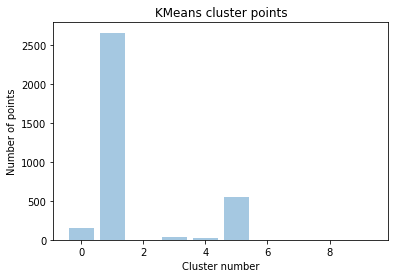

In [ ]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], data_frame.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

# **K Means using Average Words to Vectors**

In [ ]:
sentence_list = []
for row in all_null_values_removed['Cleaned Text'].values:
    sentence_list.append(row.split())

In [ ]:
import gensim
w2v_model_=gensim.models.Word2Vec(sentence_list,size=100, workers=4)

In [ ]:
import numpy as np
vectors_done = []
for done in sentence_list:
  vector_sent = np.zeros(100)
  words = 0
  for w in done:
    try:
      vector = w2v_model.wv[w]
      vector_sent += vector
      words += 1
    except:
      pass
  vector_sent /= words
  vectors_done.append(vector_sent)
vectors_done = np.array(vectors_done)
vectors_done = np.nan_to_num(vectors_done)
vectors_done.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(3422, 100)

In [ ]:
cluster_numbers = [x for x in range(3,11)]
cluster_numbers

[3, 4, 5, 6, 7, 8, 9, 10]

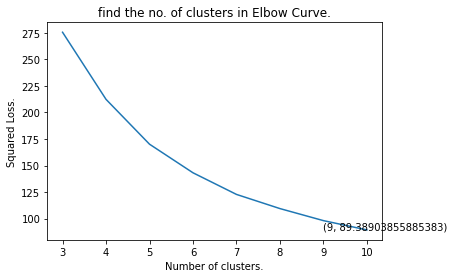

In [ ]:
errors_ = []
for clus in cluster_numbers:
    kmeans = KMeans(n_clusters = clus).fit(vectors_done)
    errors_.append(kmeans.inertia_)
    
clusters_opt = np.argmin(errors_) + 2 
plt.plot(cluster_numbers, errors_)
plt.title("find the no. of clusters in Elbow Curve.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (clusters_opt, min(errors_))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

In [ ]:
print ("The optimal clusters  are- ", clusters_opt)
print ("The loss for optimal cluster is - ", min(errors_))

The optimal clusters  are-  9
The loss for optimal cluster is -  89.8586629598327


In [ ]:
from sklearn.cluster import KMeans
model_ = KMeans(n_clusters = clusters_opt)
model_.fit(vectors_done)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
pred_cluster = model_.predict(vectors_done)
pred_cluster_2 = model_.labels_
center_cluster = model_.cluster_centers_
center_cluster[1:2]

array([[-0.00563346,  0.00160747, -0.00714562,  0.00267055, -0.00584913,
         0.00301345, -0.0047275 ,  0.00623244, -0.01516387,  0.01428006,
         0.00502038,  0.00715315, -0.00139119, -0.01814369, -0.00505958,
         0.01227225,  0.00733566, -0.00294976,  0.0072122 , -0.01813682,
        -0.00355136, -0.00757777,  0.00407796, -0.01009306,  0.01212448,
         0.00701269, -0.00179314,  0.01225184,  0.01428974,  0.01021704,
        -0.00338857,  0.00751911, -0.01046814,  0.00259698, -0.00468977,
         0.00073255,  0.01277954,  0.00251248,  0.00887883, -0.00523073,
         0.00535008, -0.0276023 ,  0.00649104,  0.01113286,  0.00128398,
        -0.01312683, -0.01349672,  0.00304393,  0.00897083,  0.01810628,
        -0.00715423, -0.01171851, -0.00973762,  0.00372635, -0.00589907,
        -0.00230171,  0.00590704,  0.00383454, -0.01279425,  0.01133352,
         0.00576663, -0.00616205, -0.0057799 , -0.0156066 ,  0.00230711,
         0.01080468, -0.0059562 ,  0.00912263,  0.0

# **DBSCAN Clustering**

In [ ]:
from sklearn.cluster import DBSCAN
min_ = 2 * 100
def lower(num, target):
    l1, r1 = 0, len(num) - 1
    while l1 <= r1:
        mid_ = int(l1 + (r1 - l1) / 2)
        if num[mid_] >= target:
            r1 = mid_ - 1
        else:
            l1 = mid_ + 1
    return l1

def compute_neighbour(x, data):
    d = []
    for value_ in data:
        dist = np.sum((x - value_) **2 )
        if(len(d) == 200 and d[199] > dist):
            l1 = int(lower(d, dist))
            if l1 < 200 and l1 >= 0 and d[l1] > dist:
                d[l1] = dist
        else:
            d.append(dist)
            d.sort()
    
    return d[199]

In [ ]:
abc = []
for val in vectors_done[:1500]:
    abc.append( compute200thnearestneighbour(val, vectors_done[:1500]) )
abc.sort()

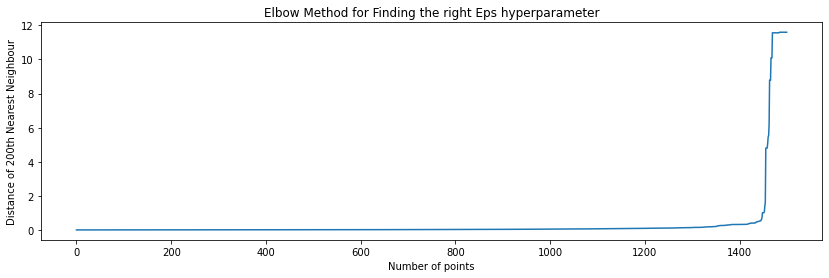

In [ ]:
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(abc))], abc)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
model_= DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model_.fit(vectors_done)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=200, n_jobs=-1, p=None)

In [ ]:
dbscandf = df
dbscandf['AVG-W2V Clus Label'] = model.labels_
dbscandf.groupby(['AVG-W2V Clus Label'])['Product Name', 'Brand Name', 'Reviews'].count()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Product Name,Brand Name,Reviews
AVG-W2V Clus Label,,,
0,3422,3422,3422


# **Hierarichal Clustering**

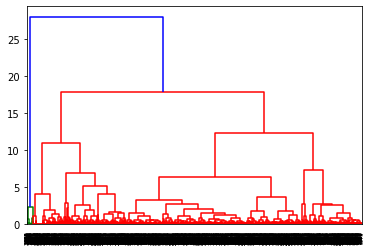

In [ ]:
import scipy
from scipy.cluster import hierarchy
dendo_gram_=hierarchy.dendrogram(hierarchy.linkage(vectors_done, method='ward'))
plt.axhline(y=35)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clus_ter_ = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Agg=clus_ter_.fit_predict(vectors_done)

In [ ]:
hcdf = dbscandf
hcdf['AVG-W2V Clus Label'] = cluster.labels_

In [ ]:
hcdf.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0     905
1     608
2     533
3      61
4    1315
Name: Reviews, dtype: int64

In [ ]:
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
Very pleased


The charging port was loose. I got that soldered in. Then needed a new battery as well. $100 later (not including cost of purchase) I have a usable phone. The phone should not have been sold in the state it was in.


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
It works good but it goes slow sometimes but its a very good phone I love it


Phone good just a little slow phone old but it's a great phone temporary right now. thank you for the great deal


______________________________________________________________________
2 reviews of assigned to cluster  2
----------------------------------------------------------------------
Great phone to replace my lost phone. The only thing is the volume up button does not work, but I can still go 

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

Using K Means we can easily classify the clusters into groups and also we can find the optimum number of clusters and train the KMeans model using the optimum number of clusters which gives us best model to classify the Reviews. Second best model is Hierarchical clustering, but it will be very difficult to classify the clusters using Hierarchical clustering. DBScan classifed all the reviews into single cluster which is not best fit.

k- value clustering us a kind of signal processing that originates from the vector quantization. It divides n observations into k clusters, such that every cluster belongs to the cluster that is with the closest mean, that serves as the clusters prototype. From the results, we can see that k-means are more understandable than DBSCAN. The DBSCAN can manage missing values in the data set.